Celem tego zadania jest nauczenie się podstaw przetwarzania języka naturalnego w Pythonie oraz umiejętności analizy sentimentów w recenzjach filmów.

Wykorzystaj przykładowy zbiór danych dostępny w nltk (nltk.corpus.movie_reviews).

Wczytaj dane i przeanalizuj je.

In [18]:
import random
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('movie_reviews')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Wczytanie recenzji i ich etykiet
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Zamieszanie danych
random.shuffle(documents)

# Rozdzielenie recenzji i etykiet
texts = [doc[0] for doc in documents]
labels = [doc[1] for doc in documents]

print(f"Liczba recenzji: {len(texts)}")
print(f"Przykład recenzji: {texts[0][:500]}...\nEtykieta: {labels[0]}")


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\megaz\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\megaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Liczba recenzji: 2000
Przykład recenzji: life is beautiful is a rare treat : a lighthearted comedy that tackles a very serious subject without committing the sins of being disrespectful , or , even worse , humorless . 
it combines a charming romance with a dash of farce , stirs in a little poignancy , and ends up a very enjoyable movie . 
it's an italian film , but don't let that discourage you . 
subtitle-phobes will be missing a wonderful experience . 
life is beautiful opens as a sweet romantic comedy , with the clownish , but good ...
Etykieta: pos


In [19]:
print(movie_reviews.words())
print(f"Łączna liczba słów: {len(movie_reviews.words())}")
print(f"Kategoria: {movie_reviews.categories()}")
print(f"Występowanie słowa good:{nltk.FreqDist(movie_reviews.words())['good']}")
print(f"Występowanie słowa good:{nltk.FreqDist(movie_reviews.words())['bad']}")
print(f"Występowanie słów:")
nltk.FreqDist(movie_reviews.words()).most_common(15)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
Łączna liczba słów: 1583820
Kategoria: ['neg', 'pos']
Występowanie słowa good:2411
Występowanie słowa good:1395
Występowanie słów:


[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

Zastosuj tokenizację do recenzji.
Usuń słowa stop oraz zrealizuj lematyzację (lub stemming) dla słów.

In [20]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenizacja
    tokens = word_tokenize(text.lower())
    # Usuwanie znaków interpunkcyjnych i stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Przetwarzanie wszystkich recenzji
processed_texts = [preprocess_text(text) for text in texts]

print(f"Przykład przetworzonej recenzji: {processed_texts[0][:500]}...")


Przykład przetworzonej recenzji: life beautiful rare treat lighthearted comedy tackle serious subject without committing sin disrespectful even worse humorless combine charming romance dash farce stir little poignancy end enjoyable movie italian film let discourage missing wonderful experience life beautiful open sweet romantic comedy clownish good natured guido roberto benigni arriving rustic italian town work waiter uncle year guido literally stumble girl dream dora nicoletta braschi romance seems picture perfect one stumblin...



Użyj klasyfikatora Naive Bayes do analizy sentimentów w recenzjach filmów.
Podziel dane na zbiór treningowy i testowy.
Wytrenuj model na zbiorze treningowym.

Dodatkowe:
* Spróbuj użyć różnych modeli klasyfikacji (np. SVM, Logistic Regression) i porównaj wyniki.
* Zastosuj inne techniki przetwarzania tekstu, takie jak TF-IDF, zamiast CountVectorizer.

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Podział danych na treningowe i testowe
X_train_text, X_test_text, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tworzenie wektorów
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TF-IDF": TfidfVectorizer(max_df=0.95, min_df=2)
}

classifiers = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', C=1, probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = []

for vec_name, vectorizer in vectorizers.items():
    # Dopasowanie wektoryzatora
    X_train_vec = vectorizer.fit_transform(X_train_text)
    X_test_vec = vectorizer.transform(X_test_text)

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            "Vectorizer": vec_name,
            "Classifier": clf_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        })

# Tworzenie DataFrame z wynikami
df_results = pd.DataFrame(results)
df_results


,Vectorizer,Classifier,Accuracy,Precision,Recall,F1-Score
0,CountVectorizer,Naive Bayes,0.7975,0.801060,0.7975,0.797476
1,CountVectorizer,SVM,0.8000,0.800300,0.8000,0.800070
2,CountVectorizer,Logistic Regression,0.8100,0.810536,0.8100,0.810086
3,TF-IDF,Naive Bayes,0.7875,0.799341,0.7875,0.786564
4,TF-IDF,SVM,0.8375,0.837472,0.8375,0.837481
5,TF-IDF,Logistic Regression,0.8200,0.820836,0.8200,0.820090


Przewiduj sentimenty recenzji w zbiorze testowym.
Oblicz dokładność modelu i przedstaw raport klasyfikacji (użyj classification_report z sklearn).
Narysuj macierz konfuzji przy użyciu seaborn lub matplotlib

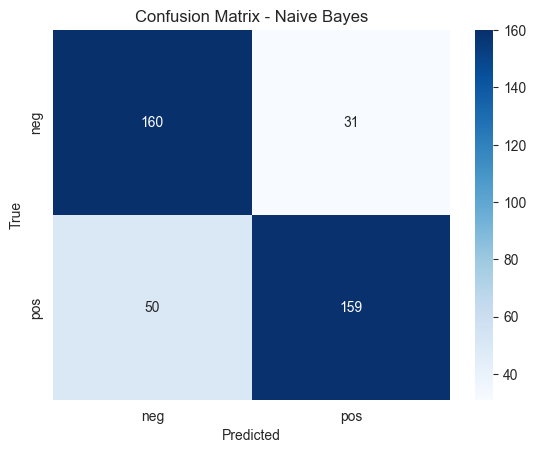

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Przygotowanie danych
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trening Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Macierz pomyłek
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmapa
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


Na podstawie analizy, stwórz wykres słupkowy lub kołowego pokazującą rozkład sentimentów w zbiorze danych (np. procent recenzji pozytywnych, negatywnych i neutralnych).

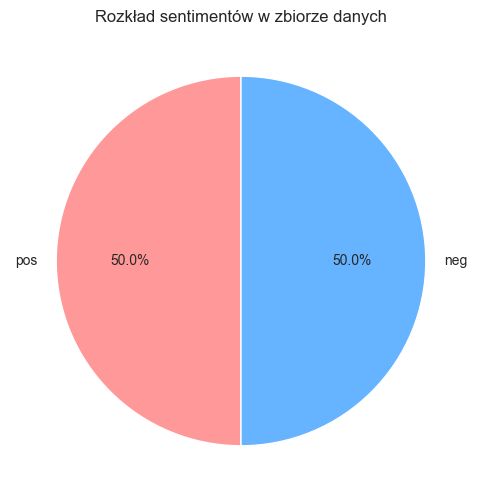

In [23]:
import pandas as pd

sentiment_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Rozkład sentimentów w zbiorze danych')
plt.show()
